<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 9 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Analysez les ventes d'une librairie avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter des graphiques




<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Étape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [10]:
#Importation de la librairie Pandas
import pandas as pd

#Importation de la librairie NumPy
import numpy as np

#Importation de ... pyplot de la librairie matplotlib
import matplotlib.pyplot as plt

#Importation de la librairie plotly express
import plotly.express as px

#Importation de la librairie seaborn
import seaborn as sns

#Importation du module datetime
import datetime as dt

#Importation du module d'expressions régulières
import re

#Importation de la fonction "seasonal_decompose" du package statsmodels (pour les myennes mobiles)
from statsmodels.tsa.seasonal import seasonal_decompose

#Importations de librairies, modules et fonctions poru les calculs statistiques
from scipy.stats import chi2_contingency as chi2_contingency

import scipy.stats as st

import statsmodels.api as sm

from statsmodels.formula.api import ols

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Éxcel</h3>
</div>

In [12]:
#Importation du fichier customers.csv
customers = pd.read_csv('P6 customers.csv')

#Importation du fichier products.csv
products = pd.read_csv('P6 products.csv')

#Importation du fichier Transactions.csv
transactions = pd.read_csv('P6 Transactions.csv',low_memory=False)


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Étape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier customers.csv</h3>
</div>

In [14]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(customers.shape[0]))
print("Le tableau comporte {} colonne(s)".format(customers.shape[1]))

Le tableau comporte 8623 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [16]:
#Afficher la nature des données dans chacune des colonnes
print ("\nLes types des données de chaque colonne : \n")
customers.info()

#Afficher le fichier customers (test)
customers


Les types des données de chaque colonne : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [18]:
#Recherche d'anomalies sur la colonne 'client_id'
print ("Le n° de client semble être de la forme c_NNNN", 
        "\nAffichons les erreurs de formatage : \n")
#Création de la liste des id_clients erronnés
list_err = [""]
id = re.compile('c_[0-9]+')
for i in range(len(customers['client_id'])):
    if not(id.match(customers.iloc[i,0])):
        list_err.append(customers.iloc[i,0])
        
#Affichage des lignes concernées du dataframe customers
display(customers.loc[customers['client_id'].isin(list_err) ,:])

#Choix du traitement de ces données : Suppression
print("Ces client_id sont invalides --> Surpprimons-les")
customers = customers.loc[~customers['client_id'].isin(list_err) ,:]
customers

Le n° de client semble être de la forme c_NNNN 
Affichons les erreurs de formatage : 



,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


Ces client_id sont invalides --> Surpprimons-les


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [20]:
#Recherche d'anomalies sur la colonne 'sex'
display(customers.loc[~customers['sex'].isin(['f','m']) ,:])
#ou
display(customers.value_counts('sex',dropna = False))
print('\nAucune anomalie détectée')

,client_id,sex,birth


sex
f    4490
m    4131
Name: count, dtype: int64


Aucune anomalie détectée


In [22]:
#Création de la colonne âge du client
cur_year = dt.date.today().year
customers['age'] = cur_year - customers['birth']

#Recherche d'anomalies sur la colonne 'age'
print("Le type des colonnes birth (et donc age) est {}, et l'age des clients est compris entre {} et {} ans ".format(customers.birth.dtype,customers.age.min(),customers.age.max()))
print('\nAucune anomalie détectée')

Le type des colonnes birth (et donc age) est int64, et l'age des clients est compris entre 20 et 95 ans 

Aucune anomalie détectée


/var/folders/c5/573_sp1n0m9g1_0lcbl_cytr0000gn/T/ipykernel_74241/1304277691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['age'] = cur_year - customers['birth']


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier products.csv</h3>
</div>

In [24]:
#Afficher les dimensions du dataset
print("Le dataframe products contient {} colonnes et {} lignes.".format(products.shape[1],products.shape[0]))

Le dataframe products contient 3 colonnes et 3287 lignes.


In [26]:
#La nature des données dans chacune des colonnes
print ("\nLes types des données de chaque colonne : \n")
products.info()

#Afficher le fichier products (test)
products


Les types des données de chaque colonne : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [28]:
#Recherche d'anomalies sur la colonne 'categ'
display(products.value_counts('categ',dropna = False))
print("\nAucune anomalie détectée")

categ
0    2309
1     739
2     239
Name: count, dtype: int64


Aucune anomalie détectée


In [30]:
#Recherche d'anomalies sur la colonne 'id_product'

#Ést-ce que le 1er caractère est bien égal à la categ associée?
print("Quels sont les produits dont le 1er caractère n'est pas égal à la categ associée?\n")
display(products.loc[products["id_prod"].str[:1] != products["categ"].astype(str),:])
print("\nCela est une erreur, nous pouvons la supprimer :\n")
products = products.loc[products["id_prod"].str[:1] == products["categ"].astype(str),:]
products

Quels sont les produits dont le 1er caractère n'est pas égal à la categ associée?



,id_prod,price,categ
731,T_0,-1.0,0



Cela est une erreur, nous pouvons la supprimer :



,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [32]:
#Recherche d'anomalies sur la colonne 'price'

#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseigné: {}".format((products.loc[products["price"].isnull(),"price"]).count()))
#Afficher le prix minimum de la colonne "price"
print("Minimum de la colonne \'price\': {}€".format(products["price"].min()))
#Afficher le prix maximum de la colonne "price"
print("Maximum de la colonne \'price\': {}€".format(products["price"].max()))
print("\nAucune anomalie détectée")

Nombres d'article avec un prix non renseigné: 0
Minimum de la colonne 'price': 0.62€
Maximum de la colonne 'price': 300.0€

Aucune anomalie détectée


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier transactions.csv</h3>
</div>

In [34]:
#Afficher les dimensions du dataset
print(" transactions contient {} colonnes \n et {} lignes.".format(transactions.shape[1],transactions.shape[0]))

 transactions contient 4 colonnes 
 et 679532 lignes.


In [36]:
#La nature des données dans chacune des colonnes
print ("\nLes types des données de chaque colonne : \n")
transactions.info()
transactions


Les types des données de chaque colonne : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [38]:
#Suppression des lignes entièrement vides
transactions.dropna(how='all', inplace=True)

#Calcul du nombre de transactions
print("Il y a {:,} transactions comptabilisées après suppression des lignes entièrement vides.".format(transactions.shape[0]).replace(","," "))

Il y a 679 532 transactions comptabilisées après suppression des lignes entièrement vides.


In [40]:
#Recherche d'anomalies sur la colonne 'client_id'
print("\nAffichons les erreurs de formatage de la colonne client_id: \n")
#Création de la liste des id_clients erronnés
list_err = [""]
id = re.compile('c_[0-9]+')
for i in range(len(transactions['client_id'])):
    if not(id.match(transactions.iloc[i,3])):
        list_err.append(transactions.iloc[i,3])
        
#Affichage des lignes concernées du dataframe transactions
display(transactions.loc[transactions['client_id'].isin(list_err) ,:])

#Choix du traitement de ces données : Suppression
print("Ces lignes sont à surpprimer :\n")
transactions = transactions.loc[~transactions['client_id'].isin(list_err) ,:]
transactions


Affichons les erreurs de formatage de la colonne client_id: 



,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Ces lignes sont à surpprimer :



,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [42]:
#Recherche d'anomalies sur la colonne 'client_id'
nb = (transactions.loc[~(transactions["client_id"].str[:]).isin(customers["client_id"].str[:]),:]).value_counts("client_id",dropna = False)
if nb.empty :
    print("Tous les clients_id du fichier transactions existent bien dans le fichier customers") 
else :
    print("Il existe des clients_id du fichier transactions qui n'ont pas de correspondance le fichier customers : ")
    display(nb)

Tous les clients_id du fichier transactions existent bien dans le fichier customers


In [44]:
#Recherche d'anomalies sur la colonne 'id_product'
nb = (transactions.loc[~(transactions["id_prod"].str[:]).isin(products["id_prod"].str[:]),:]).value_counts("id_prod",dropna = False)
if nb.empty :
    print("Tous les id_product du fichier transactions existent bien dans le fichier products") 
else :
    print("Il existe des id_product du fichier transactions qui n'ont pas de correspondance le fichier products, donc qui n'ont pas de prix : ")
    display(nb.reset_index())
    transactions = transactions.loc[(transactions["id_prod"].str[:]).isin(products["id_prod"].str[:]),:]
    print("Lignes supprimées")

Il existe des id_product du fichier transactions qui n'ont pas de correspondance le fichier products, donc qui n'ont pas de prix : 


,id_prod,count
0,0_2245,221


Lignes supprimées


In [46]:
#Vérifier si il y a des lignes en doublons == Avant de supprimer heure - min - sec ==
display(transactions.duplicated().value_counts())
print("Il n'y a pas de product_id en double : ")
# ou en affichant les doublons
display(transactions.loc[transactions.duplicated(keep=False),:])

False    679111
Name: count, dtype: int64

Il n'y a pas de product_id en double : 


,id_prod,date,session_id,client_id


In [48]:
#Recherche d'anomalies sur la colonne 'session_id'
print("\nAffichons les erreurs de formatage de la colonne session_id: \n")
#Création de la liste des id_clients erronnés
list_err = [""]
id = re.compile('s_[0-9]+')
for i in range(len(transactions['session_id'])):
    if not(id.match(transactions.iloc[i,2])):
        list_err.append(transactions.iloc[i,2])
        
#Affichage des lignes concernées du dataframe transactions
display(transactions.loc[transactions['session_id'].isin(list_err) ,:])

#Choix du traitement de ces données : Suppression
print("Ces lignes sont à surpprimer \n")
transactions = transactions.loc[~transactions['session_id'].isin(list_err) ,:]
transactions


Affichons les erreurs de formatage de la colonne session_id: 



,id_prod,date,session_id,client_id


Ces lignes sont à surpprimer 



,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [50]:
#changement du type de la colonne date
#gardons uniquement la 'date' de la session sans le 'time' i.e. les 10 premiers caractères
transactions ["date"] = transactions ["date"].str[:10]

#passons le type de la colonne 'date' en datetime
#transactions['date'] = transactions['date'].apply(normalize_date)
transactions['date'] = pd.to_datetime(transactions['date'], format='%Y-%m-%d')

transactions


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20,s_211425,c_103
1,1_251,2022-02-02,s_158752,c_8534
2,0_1277,2022-06-18,s_225667,c_6714
3,2_209,2021-06-24,s_52962,c_6941
4,0_1509,2023-01-11,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15,s_150195,c_8489
679528,1_639,2022-03-19,s_181434,c_4370
679529,0_1425,2022-12-20,s_314704,c_304
679530,0_1994,2021-07-16,s_63204,c_2227


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Étape 3 - Jointures des fichiers et premières analyses </h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Jointures des transactions et produits </h3>
</div>

In [66]:
#Jointure des fichiers transaction et produits sur id_prod
df_merge = pd.merge (transactions,products, how ='left', on = 'id_prod')
df_merge['categ'] = df_merge['categ'].astype(int,errors = 'ignore')
df_merge

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20,s_211425,c_103,4.18,0
1,1_251,2022-02-02,s_158752,c_8534,15.99,1
2,0_1277,2022-06-18,s_225667,c_6714,7.99,0
3,2_209,2021-06-24,s_52962,c_6941,69.99,2
4,0_1509,2023-01-11,s_325227,c_4232,4.99,0
...,...,...,...,...,...,...
679106,0_1551,2022-01-15,s_150195,c_8489,12.99,0
679107,1_639,2022-03-19,s_181434,c_4370,10.99,1
679108,0_1425,2022-12-20,s_314704,c_304,12.99,0
679109,0_1994,2021-07-16,s_63204,c_2227,4.98,0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Étude des prix</h3>
</div>

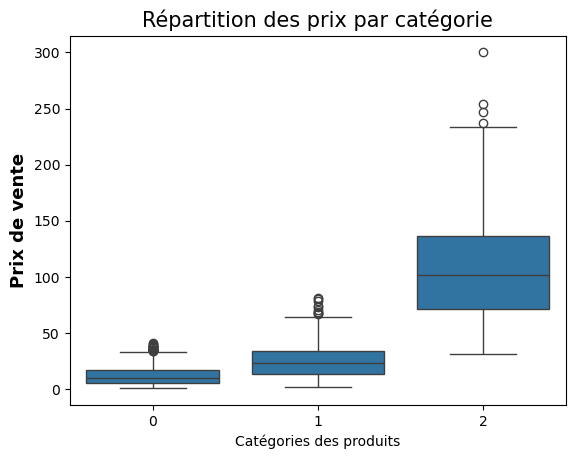

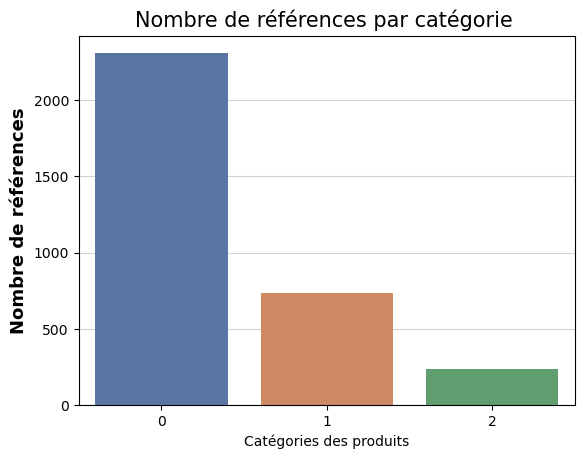

,categ,id_prod
0,0,2308
1,1,739
2,2,239


In [68]:
#Création d'une Boite à moustache de la répartition des prix 
plt.title("Répartition des prix par catégorie",fontsize =15)
plt.ylabel('Prix de vente',fontweight ='bold',fontsize = 13)
plt.xlabel('Catégories des produits')
sns.boxplot(data=products, x='categ', y='price')
plt.show()

#Répartition des références par catégories
df_ref = products.groupby('categ')['id_prod'].count().reset_index()
#Génération et affichage du graphique
plt.title("Nombre de références par catégorie ",fontsize =15)
plt.xlabel('Catégories des produits')
plt.ylabel('Nombre de références',fontweight ='bold',fontsize = 13)
sns.barplot(data=df_ref,x ='categ', y='id_prod',hue = 'categ', palette="deep", legend = False)
plt.grid(axis = 'y',color='lightgrey')
plt.gca().set_axisbelow(True)
plt.show()
df_ref

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Étude du chiffre d'affaires</h3>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3.1 Évolution du chiffre d'affaires par jour</h4>
</div>

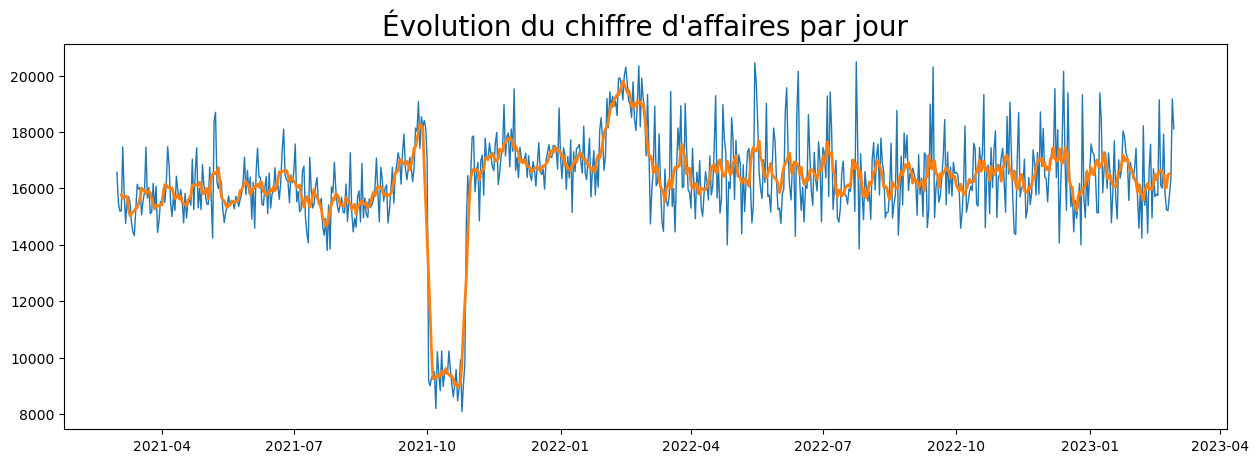

In [83]:
#Calcul des chiffres d'affaires

#Évolution du chiffre d'affaires par jour
col = ['date','price']
df_merge['date'] = pd.to_datetime(df_merge['date'])
df_CA = df_merge[col].groupby('date')['price'].sum().reset_index()
#display(df_CA)

#Génération et affichage du graphique
plt.figure(figsize = (15,5))
plt.title("Évolution du chiffre d'affaires par jour",fontsize =20)

plt.plot(df_CA['date'], df_CA['price'], linewidth  = 1)
#Affichage de la moyenne mobile sur 7js
decomp_x = seasonal_decompose(df_CA.price, period = 7)
plt.plot(df_CA['date'],decomp_x.trend, linewidth  = 2)

plt.xlabel('')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3.2 Évolution du chiffre d'affaires par mois</h4>
</div>

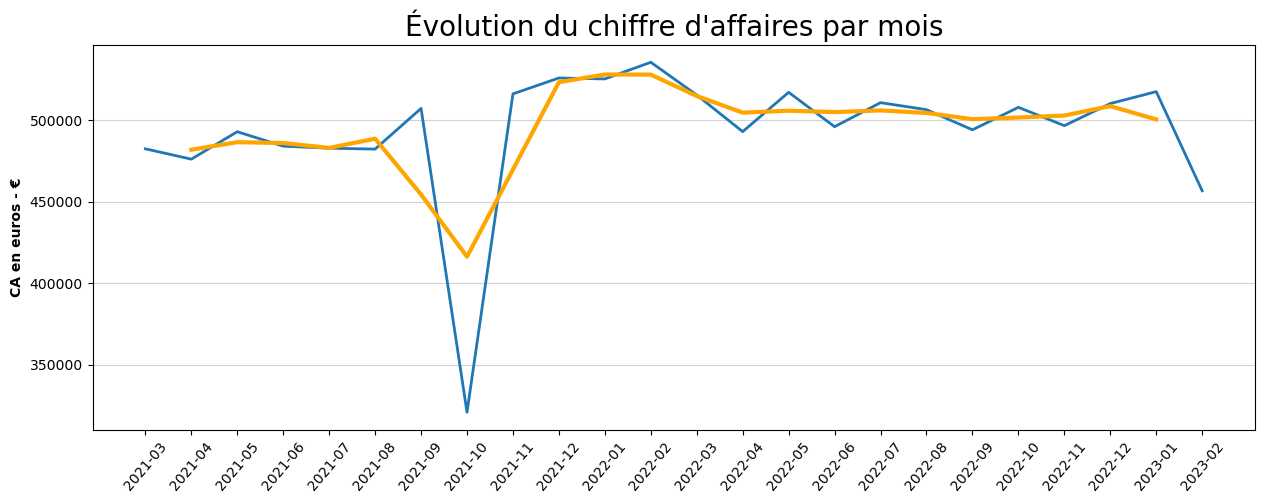

In [128]:
#Calcul des chiffres d'affaires

#Évolution du chiffre d'affaires par mois
col = ['date','price']
df_CA = df_merge[col]
df_CA = df_CA.groupby(df_CA['date'].dt.to_period('M'))['price'].sum().reset_index()
#display(df_CA)

#Génération et affichage du graphique
plt.figure(figsize = (15,5))
plt.title("Évolution du chiffre d'affaires par mois",fontsize =20)

df_CA['date'] = df_CA['date'].astype(str) 
plt.plot(df_CA['date'], df_CA['price'],linewidth=2)

#Affichage de la moyenne mobile sur 2 mois
decomp_x = seasonal_decompose(df_CA.price, period = 2)
plt.plot(df_CA['date'],decomp_x.trend, color = "orange",linewidth=3)

plt.xticks(rotation=50)
plt.xlabel('')
plt.ylabel('CA en euros - €',fontweight ='bold')
plt.grid(axis = 'y',color='lightgrey')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3.3 Évolution du chiffre d'affaires par catégorie par mois</h4>
</div>

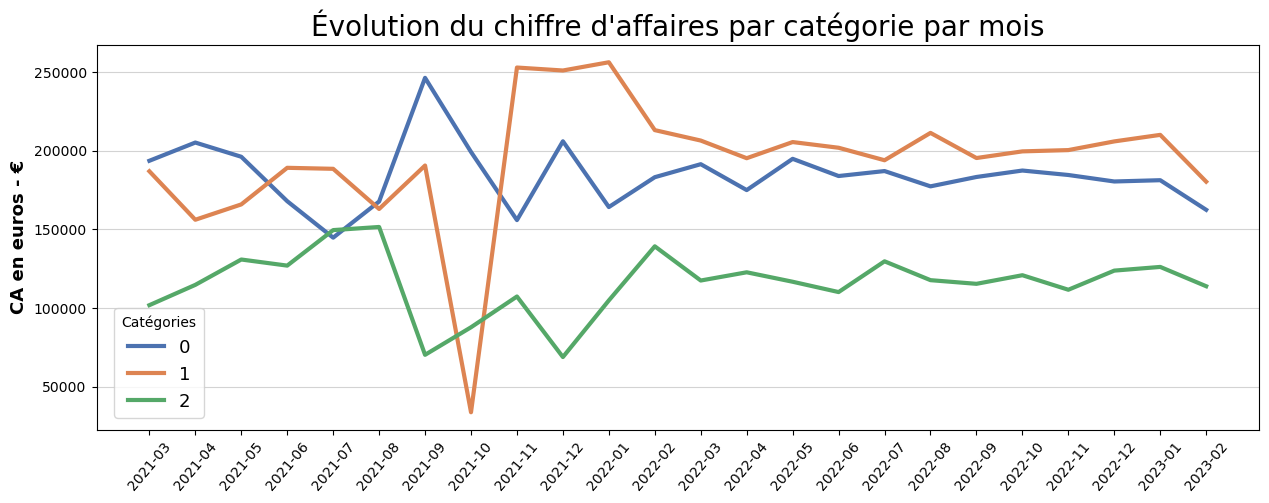

In [113]:
#Chiffre d'affaires par catégorie par mois
col = ["date","categ","price"]
df_CA = df_merge[col].groupby([df_merge['date'].dt.to_period('M'),'categ'])['price'].sum().reset_index()
df_CA['price'] = round(df_CA['price'],0)
#display(df_CA)

#Génération et affichage du graphique
plt.figure(figsize = (15,5))
plt.title("Évolution du chiffre d'affaires par catégorie par mois",fontsize =20)

# Génération des courbes
df_CA['date'] = df_CA['date'].astype(str) 
sns.lineplot(data=df_CA, x='date', y='price', hue='categ', palette="deep",linewidth = 3)

plt.xticks(rotation=50)
plt.xlabel('')
plt.ylabel('CA en euros - €',fontweight ='bold',fontsize = 13)
plt.grid(axis = 'y',color='lightgrey')
plt.legend(fontsize = 13, bbox_to_anchor=(0.1,0.34), title = "Catégories")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3.4 Évolution du nombre de clients par mois</h4>
</div>

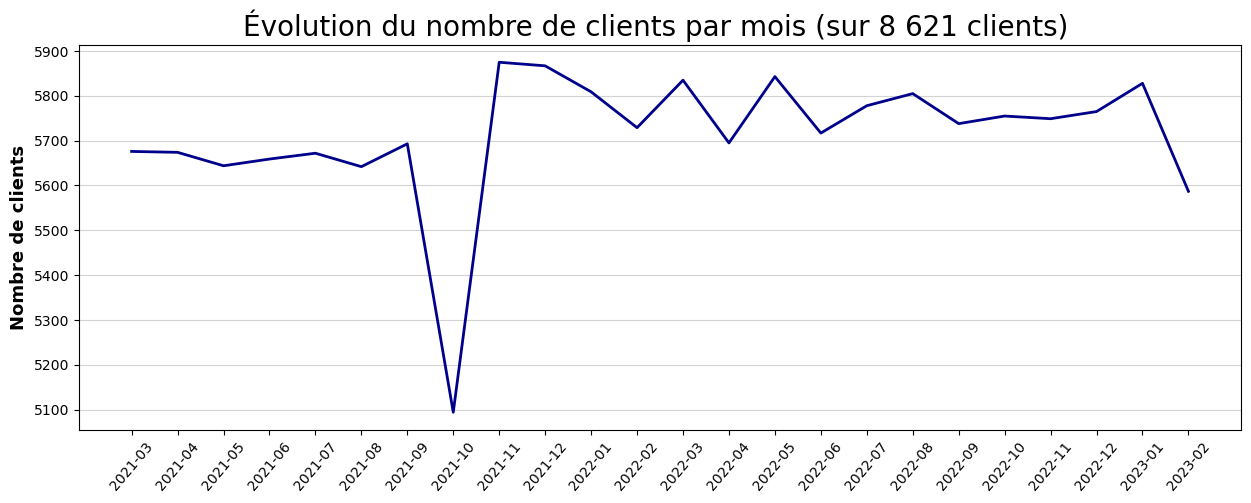

In [117]:
#Calcul du nombre de clients par mois
col = ["date","client_id"]
df_clients = df_merge.groupby([df_merge['date'].dt.to_period('M')])['client_id'].nunique().reset_index()
#display(df_clients)

#Génération et affichage du graphique
plt.figure(figsize = (15,5))
plt.title("Évolution du nombre de clients par mois (sur {:,} clients) ".format(customers.shape[0]).replace(","," "),fontsize =20)

df_clients['date'] = df_clients['date'].astype(str) 
sns.lineplot(data=df_clients,x ='date', y='client_id', color = 'darkblue',  linewidth = 2)

#plt.ylim(4000)
plt.xticks(rotation=50)
plt.ylabel('Nombre de clients',fontweight ='bold',fontsize = 13)
plt.xlabel('')
plt.grid(axis = 'y',color='lightgrey')
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3.5 Évolution du nombre de transactions par mois</h4>
</div>

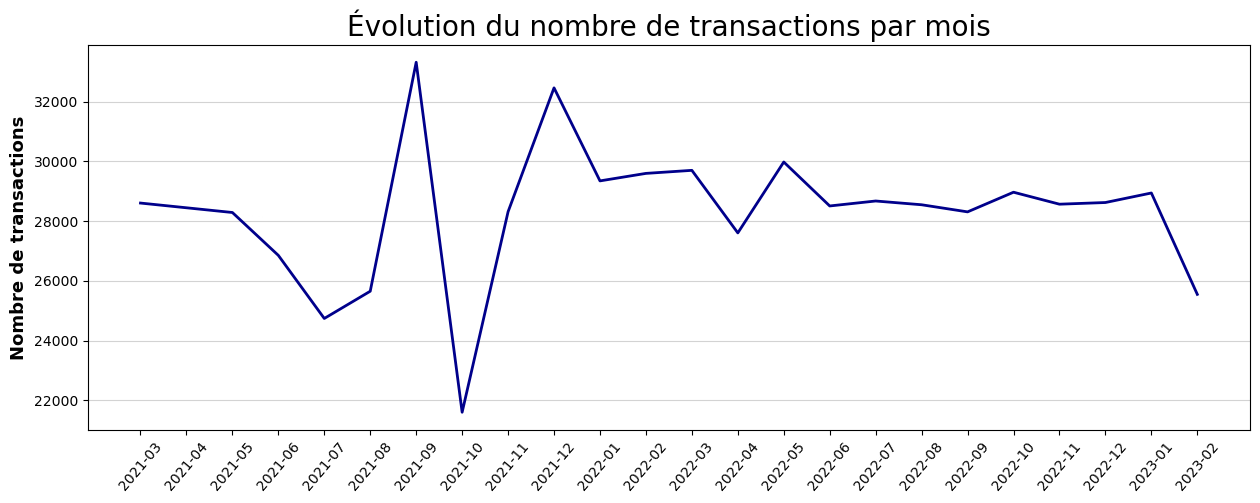

(Le nombre total de transactions enregistrées est de 679 111)


In [122]:
#Calcul du nombre de transactions produits = nb de lignes du df_merge

df_tr = df_merge.groupby([df_merge['date'].dt.to_period('M')])['id_prod'].value_counts().reset_index()
df_tr = df_tr.groupby('date')['count'].sum().reset_index()
#display(df_tr)

#Génération et affichage du graphique
plt.figure(figsize = (15,5))
plt.title("Évolution du nombre de transactions par mois",fontsize =20)
df_tr['date'] = df_tr['date'].astype(str) 
sns.lineplot(data=df_tr,x ='date', y='count', color = 'darkblue', linewidth = 2)

plt.xticks(rotation=50)
plt.xlabel('')
plt.ylabel('Nombre de transactions',fontweight ='bold',fontsize = 13)
plt.grid(axis = 'y',color='lightgrey')
plt.show()

#Calcul du total pour vérifier si on retombe sur le nb de lg de df_merge ie 679 111
print('(Le nombre total de transactions enregistrées est de {:,})'.format(df_tr['count'].sum()).replace(","," "))

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3.6 Évolution du nombre de produits différents vendus par mois</h4>
</div>

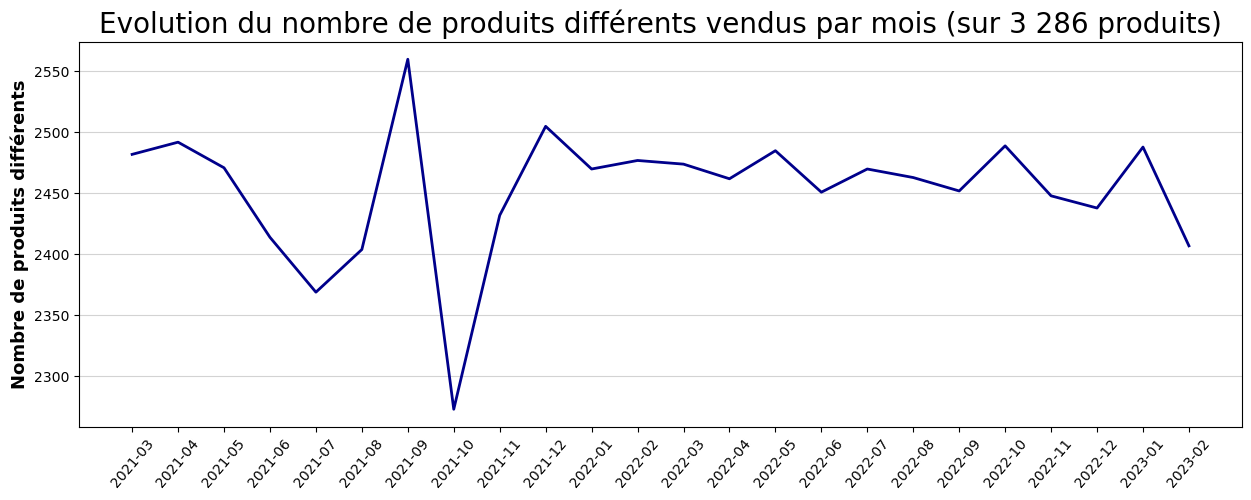

In [107]:
#Calcul du nombre de produits différents vendus
col = ["date","id_prod"]

df_prod = df_merge.groupby([df_merge['date'].dt.to_period('M')])['id_prod'].nunique().reset_index()
#display(df_prod)

#Génération et affichage du graphique
plt.figure(figsize = (15,5))
plt.title("Évolution du nombre de produits différents vendus par mois (sur {:,} produits)".format(products.shape[0]).replace(","," "),fontsize =20)

df_prod['date'] = df_prod['date'].astype(str) 
sns.lineplot(data=df_prod,x ='date', y='id_prod', color = 'darkblue', linewidth = 2)

plt.xticks(rotation=50)
plt.xlabel('')
plt.ylabel('Nombre de produits différents',fontweight ='bold',fontsize = 13)
plt.grid(axis = 'y',color='lightgrey')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3.7 Identification des meilleurs clients par année</h4>
</div>

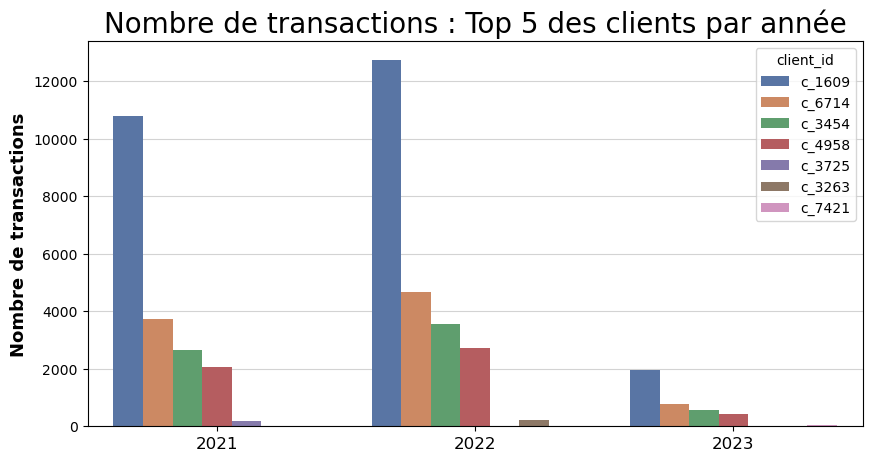

Il ressort les 4 mêmes clients BtoB chaque année:
 0    c_1609
1    c_6714
2    c_3454
3    c_4958
Name: client_id, dtype: object


In [150]:
#Identification des meilleurs clients par année
col = ["date","client_id"]
df_clients = df_merge[col].groupby([df_merge['date'].dt.to_period('Y')])['client_id'].value_counts().reset_index()
#display(df_clients)

#Éxtraction du top 5 de chaque année
df1 = df_clients.loc[(df_clients['date']== "2021"),:].head()
df2 = df_clients.loc[(df_clients['date']== "2022"),:].head()
df3 = df_clients.loc[(df_clients['date']== "2023"),:].head()

df_top5 = pd.concat([df1, df2, df3], ignore_index=True)
df_top5

#Génération et affichage du graphique
plt.figure(figsize = (10,5))
sns.barplot(data=df_top5,x ='date', y='count', hue = 'client_id',palette="deep")
plt.xlabel('')
plt.title("Nombre de transactions : Top 5 des clients par année",fontsize =20)
plt.xticks(fontsize = 12)
plt.ylabel('Nombre de transactions',fontweight ='bold',fontsize = 13)
plt.grid(axis = 'y',color='lightgrey')
plt.gca().set_axisbelow(True)
plt.show()

list_BtoB = df_top5.head(4)['client_id']
print("Il ressort les 4 mêmes clients BtoB chaque année:\n",list_BtoB)


<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3.8 Répartition du chiffre d'affaires pour les clients BtoB</h4>
</div>

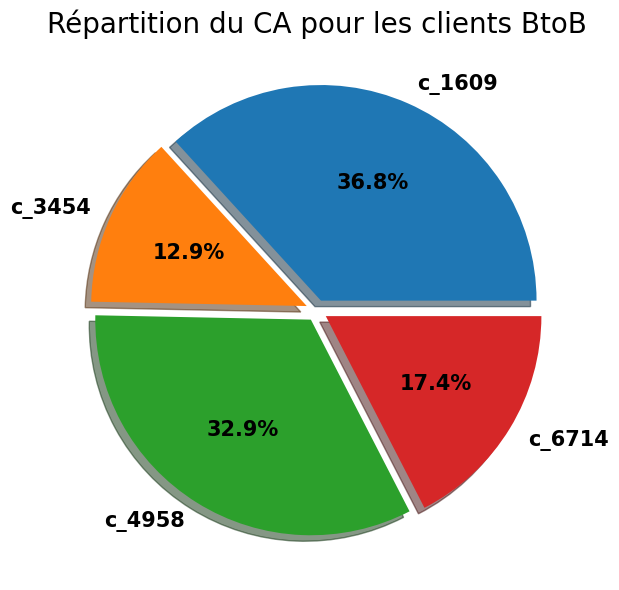

In [162]:
#Répartition du chiffre d'affaires pour les clients BtoB

#Éxtraction des lg concernant les 4 BtoB
df_CA = df_merge[df_merge.client_id.isin(list_BtoB)]

#Calcul du CA par client BtoB
df_CA = df_CA.groupby('client_id')['price'].sum().reset_index()

plt.figure(figsize = (10,7))
plt.title("Répartition du CA pour les clients BtoB",fontsize =20)
plt.rcParams.update({'font.size': 15, 'font.weight':'bold'})

plt.pie(x=df_CA["price"],labels=df_CA["client_id"],autopct = '%.1F%%',shadow=True,explode=(0.05,0.05,0.05,0.05))
plt.show()
plt.close()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - ZOOM SUR LES RÉFÉRENCES    </h3>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4.1 Les tops 10</h4>
</div>

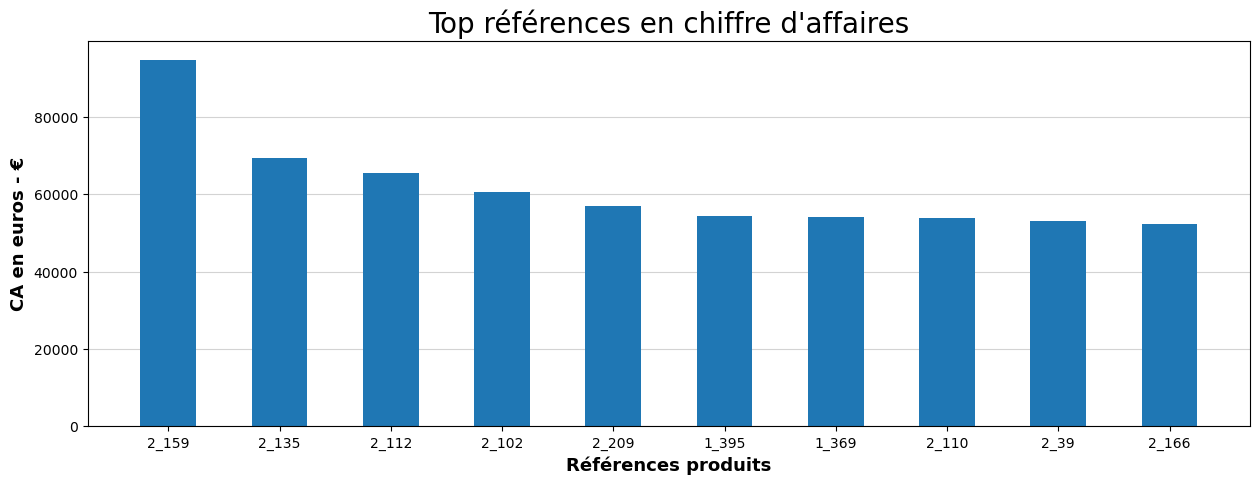

In [192]:
#Top références en CA
col = ['id_prod','price']
top_CA = df_merge[col].groupby('id_prod')['price'].sum().sort_values(ascending = False).reset_index().head(10)
top_CA['price'] = round(top_CA['price'])

#Génération et affichage du graphique
plt.figure(figsize = (15,5))
plt.rcParams.update({'font.size': 10, 'font.weight':'normal'})
plt.title("Top références en chiffre d'affaires",fontsize =20)
plt.xlabel('Références produits',fontweight ='bold',fontsize = 13)
plt.ylabel('CA en euros - €',fontweight ='bold',fontsize = 13)
plt.bar(top_CA['id_prod'],top_CA['price'],width = 0.5)
plt.grid(axis = 'y',color='lightgrey')
plt.gca().set_axisbelow(True)
plt.show()

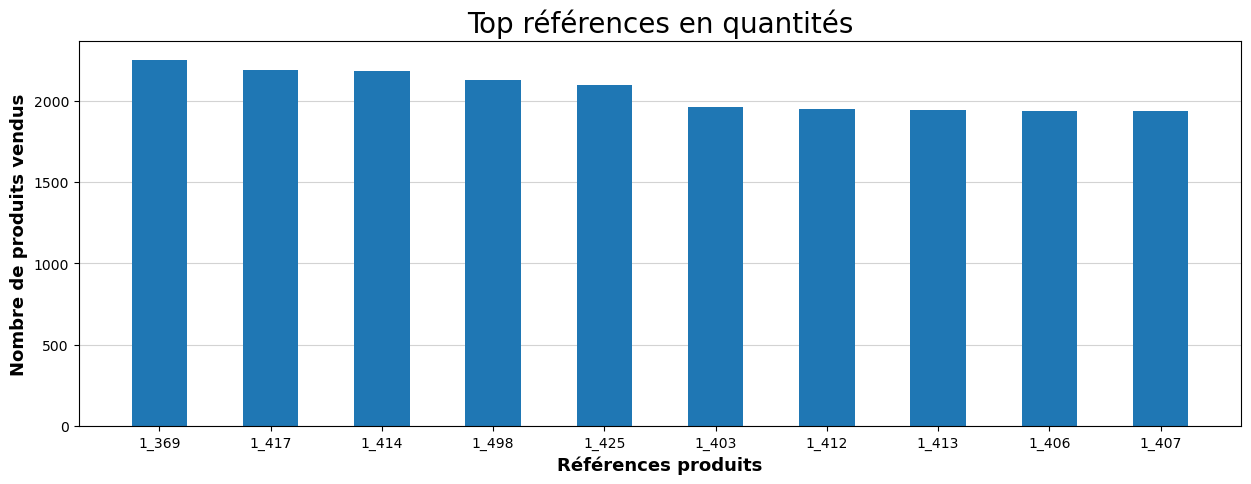

In [194]:
#Top références en quantité
top_CA = df_merge['id_prod'].value_counts().sort_values(ascending = False).reset_index().head(10)

#Génération et affichage du graphique
plt.figure(figsize = (15,5))
plt.title("Top références en quantités",fontsize =20)
plt.xlabel('Références produits',fontweight ='bold',fontsize = 13)
plt.ylabel('Nombre de produits vendus',fontweight ='bold',fontsize = 13)
plt.bar(top_CA['id_prod'],top_CA['count'],width = 0.5)
#plt.rcParams.update({'font.size': 10, 'font.weight':'normal'})
plt.grid(axis = 'y',color='lightgrey')
plt.gca().set_axisbelow(True)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4.2 Les flops</h4>
</div>

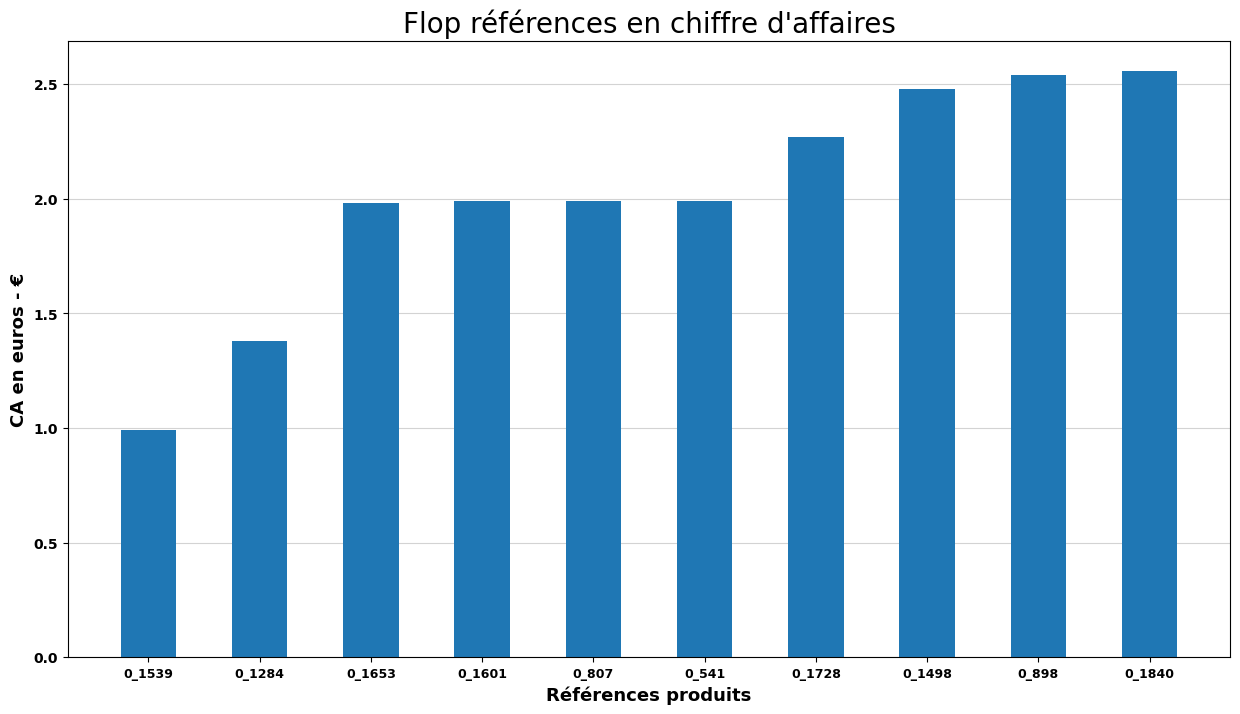

In [214]:
#Flop références en CA
top_CA = df_merge[col].groupby('id_prod')['price'].sum().sort_values().reset_index().head(10)
#display(top_CA)

#Génération et affichage du graphique
plt.figure(figsize = (15,8))
plt.title("Flop références en chiffre d'affaires",fontsize =20)
plt.xlabel('Références produits',fontweight ='bold',fontsize = 13)
plt.ylabel('CA en euros - €',fontweight ='bold',fontsize = 13)
plt.xticks(fontsize = 9,fontweight ='bold')
plt.yticks(fontsize = 10,fontweight ='bold')

plt.bar(top_CA['id_prod'],top_CA['price'],width = 0.5)

plt.grid(axis = 'y',color='lightgrey')
plt.gca().set_axisbelow(True)
plt.show()

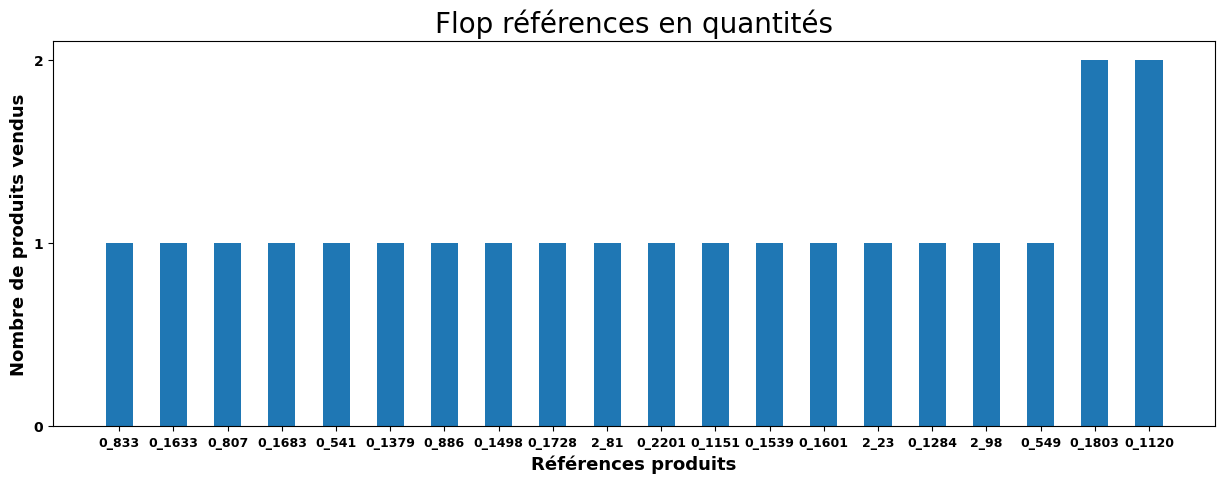

In [228]:
#Flop références en quantité
top_CA = df_merge['id_prod'].value_counts().sort_values().reset_index().head(20)
#display(top_CA)

#Génération et affichage du graphique
plt.figure(figsize = (15,5))
plt.title("Flop références en quantités",fontsize =20)
plt.xlabel('Références produits',fontweight ='bold',fontsize = 13)
plt.ylabel('Nombre de produits vendus',fontweight ='bold',fontsize = 13)
plt.xticks(fontsize = 9,fontweight ='bold')
plt.yticks(range(top_CA['count'].max()+1),fontsize = 10,fontweight ='bold')

#plt.xticks(rotation=50)

plt.bar(top_CA['id_prod'],top_CA['count'],width = 0.5)
plt.rcParams.update({'font.size': 6, 'font.weight':'normal'})
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4.4 Courbe de Lorenz</h4>
</div>

,client_id,price,pct_CA,cumul_pct_CA
0,c_8351,6.31,5.323220e-07,5.323220e-07
1,c_8140,8.30,7.002016e-07,1.232524e-06
2,c_8114,9.98,8.419292e-07,2.074453e-06
3,c_240,11.06,9.330397e-07,3.007492e-06
4,c_4648,11.20,9.448504e-07,3.952343e-06
...,...,...,...,...
8595,c_3263,5276.87,4.451654e-04,9.256748e-01
8596,c_3454,113637.93,9.586682e-03,9.352615e-01
8597,c_6714,153598.92,1.295786e-02,9.482194e-01
8598,c_4958,289760.34,2.444466e-02,9.726640e-01


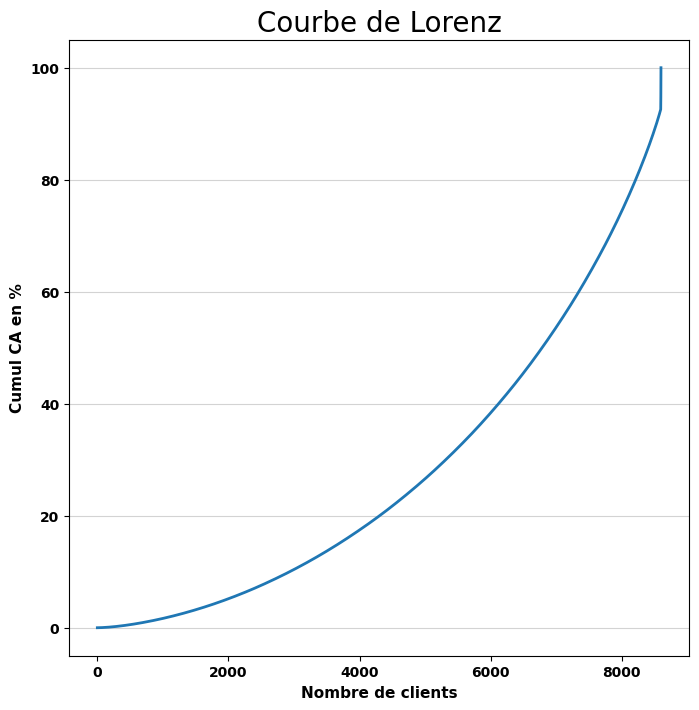

In [251]:
col = ['client_id','price']
df_Lorenz = df_merge[col].groupby('client_id')['price'].sum().sort_values().reset_index()
CA_total = df_Lorenz['price'].sum()
df_Lorenz["pct_CA"]  = df_Lorenz["price"]/CA_total
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_Lorenz["cumul_pct_CA"] = df_Lorenz["pct_CA"].cumsum()
display(df_Lorenz)

#Génération et affichage du graphique
plt.figure(figsize = (8,8))
plt.title("Courbe de Lorenz",fontsize =20)
plt.yticks(fontsize = 10,fontweight ='bold')
plt.xticks(fontsize = 10,fontweight ='bold')
plt.xlabel('Nombre de clients',fontsize = 11,fontweight ='bold')
plt.ylabel('Cumul CA en %',fontsize = 11,fontweight ='bold')
plt.grid(axis = 'y',color='lightgrey')
plt.plot(df_Lorenz.index,df_Lorenz['cumul_pct_CA']*100,linewidth=2)
plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Étape 4 - Analyses statistiques </h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.1 - Jointures sans les 4 clients BtoB</h3>
</div>

In [313]:
#Création d'un df sans les clients BtoB : c_1609, c_6714, c_3454, c_4958 = list_BtoB
IndexBtoB = customers[customers['client_id'].isin(list_BtoB)].index
customers2 = customers.drop(IndexBtoB)

#Jointure des fichiers transaction et produits sur id_prod
df_merge = pd.merge (customers2,transactions, how ='left', on = 'client_id')
df_merge = pd.merge (products,df_merge, how ='left', on = 'id_prod')
df_merge.reset_index()
df_merge
#display(df_merge.value_counts('client_id',dropna = False))

,id_prod,price,categ,client_id,sex,birth,age,date,session_id
0,0_1421,19.99,0,c_5152,f,1986.0,38.0,2021-04-17,s_21727
1,0_1421,19.99,0,c_2167,f,1960.0,64.0,2021-11-24,s_124134
2,0_1421,19.99,0,c_2167,f,1960.0,64.0,2022-08-24,s_257560
3,0_1421,19.99,0,c_3060,m,1971.0,53.0,2021-04-06,s_16742
4,0_1421,19.99,0,c_3060,m,1971.0,53.0,2022-03-06,s_175117
...,...,...,...,...,...,...,...,...,...
632496,1_140,38.56,1,c_7406,m,1988.0,36.0,2021-12-09,s_131828
632497,0_1920,25.16,0,c_7748,f,1989.0,35.0,2023-01-30,s_334324
632498,0_1920,25.16,0,c_7748,f,1989.0,35.0,2021-05-30,s_41465
632499,0_1920,25.16,0,c_7748,f,1989.0,35.0,2022-12-30,s_319303


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.2 - Analyses bivariées - recherche de corrélation </h3>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.2.1 Lien entre le genre d'un client et les catégories des livres achetés</h4>
</div>

,categ,sex,count
0,0,f,200793
1,0,m,186488
2,1,f,111331
3,1,m,101017
4,2,f,16980
5,2,m,15868


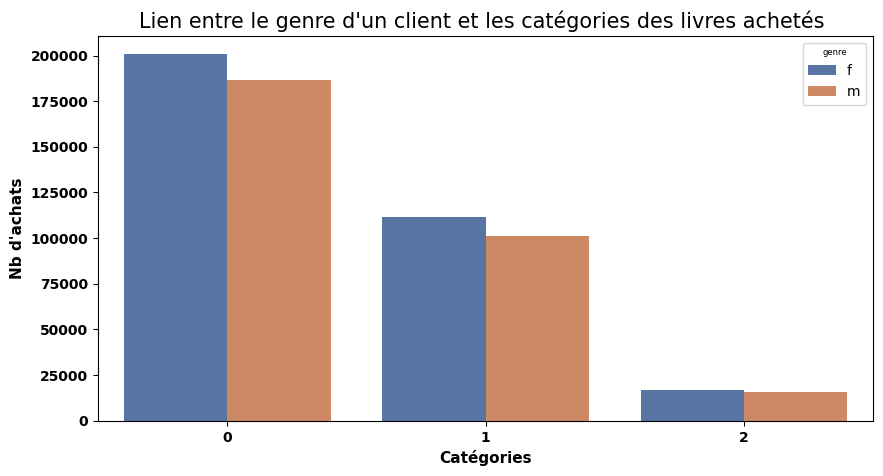

In [276]:
#Analyse de deux variables qualitatives
df = df_merge.groupby(['categ'])['sex'].value_counts().reset_index()
display(df)

#Génération et affichage du graphique
plt.figure(figsize = (10,5))
plt.title("Lien entre le genre d'un client et les catégories des livres achetés ",fontsize =15)
plt.xlabel('Catégories',fontsize = 11,fontweight ='bold')
plt.ylabel('Nb d\'achats',fontsize = 11,fontweight ='bold')
plt.yticks(fontsize = 10,fontweight ='bold')
plt.xticks(fontsize = 10,fontweight ='bold')
sns.barplot(data=df,x ='categ', y='count',hue = 'sex', palette="deep")
plt.legend(fontsize = 10, bbox_to_anchor=(1,1),title = 'genre')


In [301]:
#Analyse de deux variables qualitatives
#Tableau de contingence + Khi-2, seuil de la p-valeur à 5%
df = pd.crosstab(df_merge.sex,df_merge.categ,margins=True,margins_name="Total")
print("Affichons le tableau de contingence entre la catégorie de livre acheté et le genre d'un client:",
"\n(2 variables qualitatives)\n")
display(df)

khi2, pval , ddl , contingent_theorique = chi2_contingency(df)
print("Appliquons le test du χ2 afin de déterminer la p-value : p-val =",pval,"\n")
if pval<0.05 :
    print ("Pour un seuil de 5%, nous pouvons dire que les 2 variables sont corrélées")
else : print("Pour un seuil de 5%, nous pouvons dire que les 2 variables ne sont pas corrélées")

Affichons le tableau de contingence entre la catégorie de livre acheté et le genre d'un client: 
(2 variables qualitatives)



categ,0,1,2,Total
sex,,,,
f,200793,111331,16980,329104
m,186488,101017,15868,303373
Total,387281,212348,32848,632477


Appliquons le test du χ2 afin de déterminer la p-value : p-val = 0.002537181924441951 

Pour un seuil de 5%, nous pouvons dire que les 2 variables sont corrélées


<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.2.2 Lien entre l'âge des clients et le montant total des achats</h4>
</div>

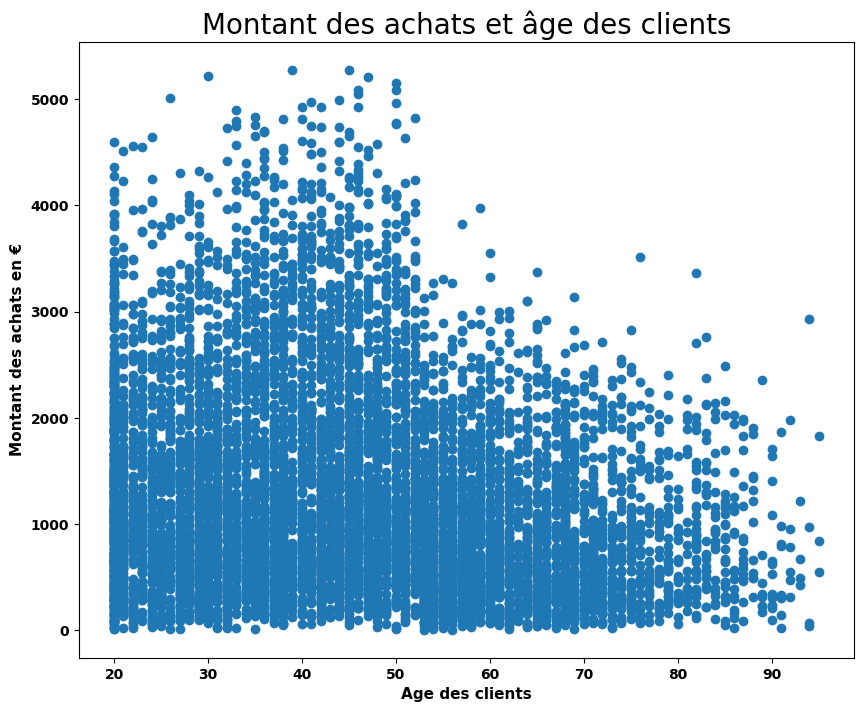

Calculons le coefficient de Pearson pour identifier s'il y a une corrélation entre ces 2 valeurs quantitatives :
 CoefPearson =  -0.18837617927219485
Pour un seuil de 5%, nous pouvons dire que les 2 variables ne sont pas corrélées linéairement.


In [324]:
#Pearson - correlation linéaire? seuil de la p-valeur à 5%

#Calcul du montant total des achats pour chaque client
df_clients = df_merge.groupby(['client_id','age'])['price'].sum().reset_index()
#display(df_clients)
#Génération et affichage du graphique
plt.figure(figsize = (10,8))
plt.title("Montant des achats et âge des clients",fontsize =20)
plt.scatter(df_clients['age'],df_clients['price'])
plt.xlabel('Age des clients',fontsize = 11,fontweight ='bold')
plt.ylabel('Montant des achats en €',fontsize = 11,fontweight ='bold')
plt.yticks(fontsize = 10,fontweight ='bold')
plt.xticks(fontsize = 10,fontweight ='bold')
plt.show()

cp = st.pearsonr(df_clients['age'],df_clients['price'])[0]
print("Calculons le coefficient de Pearson pour identifier s'il y a une corrélation entre ces 2 valeurs quantitatives :\n",
      "CoefPearson = ",cp)
if abs(cp)<0.05 :
    print ("Pour un seuil de 5%, nous pouvons dire que les 2 variables sont corrélées de manière linéaire")
else : print("Pour un seuil de 5%, nous pouvons dire que les 2 variables ne sont pas corrélées linéairement.")

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.2.3 Lien entre l'âge des clients  et la fréquence d'achat</h4>
</div>

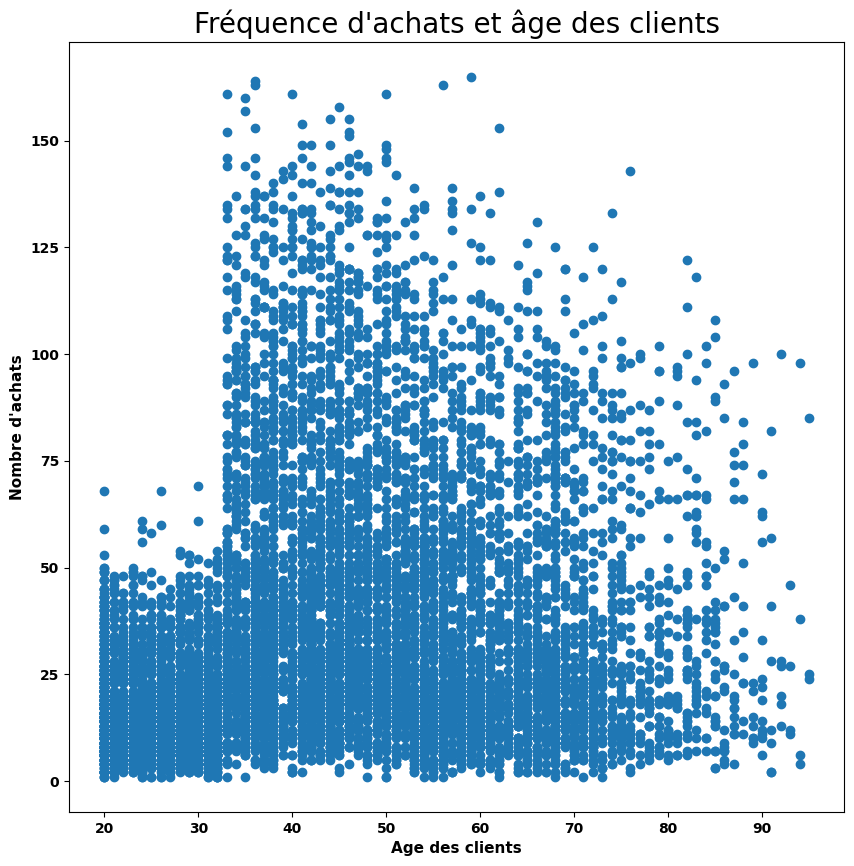

Calculons le coefficient de Pearson pour identifier s'il y a une corrélation entre ces 2 valeurs quantitatives :
 CoefPearson =  0.16457484966114383
Pour un seuil de 5%, nous pouvons dire que les 2 variables ne sont pas corrélées linéairement.


In [328]:
#Pearson - correlation linéaire? seuil de la p-valeur à 5%

#Calcul de la fréquence d'achats (session_id) pour chaque client
df_clients = df_merge.groupby(['client_id','age'])['session_id'].nunique().reset_index()
#display(df_clients)

#Génération et affichage du graphique
plt.figure(figsize = (10,10))
plt.title("Fréquence d'achats et âge des clients",fontsize =20)
plt.scatter(df_clients['age'],df_clients['session_id'])
plt.xlabel('Age des clients',fontsize = 11,fontweight ='bold')
plt.ylabel('Nombre d\'achats',fontsize = 11,fontweight ='bold')
plt.yticks(fontsize = 10,fontweight ='bold')
plt.xticks(fontsize = 10,fontweight ='bold')
plt.show()

cp = st.pearsonr(df_clients['age'],df_clients['session_id'])[0]
print("Calculons le coefficient de Pearson pour identifier s'il y a une corrélation entre ces 2 valeurs quantitatives :\n",
      "CoefPearson = ",cp)
if abs(cp)<0.05 :
    print ("Pour un seuil de 5%, nous pouvons dire que les 2 variables sont corrélées de manière linéaire")
else : print("Pour un seuil de 5%, nous pouvons dire que les 2 variables ne sont pas corrélées linéairement.")[

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.2.4 Lien entre l'âge des clients  et la taille du panier moyen</h4>
</div>

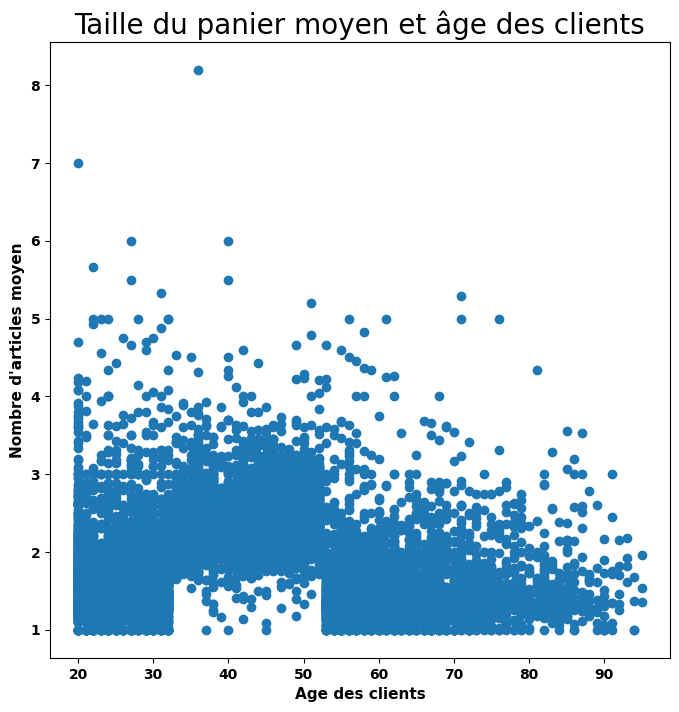

Calculons le coefficient de Pearson pour identifier s'il y a une corrélation entre ces 2 valeurs quantitatives :
 CoefPearson =  -0.21283968746415244
Pour un seuil de 5%, nous pouvons dire que les 2 variables ne sont pas corrélées linéairement.


In [342]:
#Pearson - correlation linéaire? p-valeur à 5%

#Calcul de la taille du panier moyen (session_id) pour chaque client
df_clients = df_merge.groupby(['client_id','age'])['session_id'].value_counts().reset_index()
df_clients = df_clients.groupby(['client_id','age'])['count'].mean().reset_index()
#display(df_clients)

#Génération et affichage du graphique
plt.figure(figsize = (8,8))
plt.title("Taille du panier moyen et âge des clients",fontsize =20)
plt.scatter(df_clients['age'],df_clients['count'])
plt.xlabel('Age des clients',fontsize = 11,fontweight ='bold')
plt.ylabel('Nombre d\'articles moyen',fontsize = 11,fontweight ='bold')
plt.yticks(fontsize = 10,fontweight ='bold')
plt.xticks(fontsize = 10,fontweight ='bold')
plt.show()

cp = st.pearsonr(df_clients['age'],df_clients['count'])[0]
print("Calculons le coefficient de Pearson pour identifier s'il y a une corrélation entre ces 2 valeurs quantitatives :\n",
      "CoefPearson = ",cp)
if abs(cp)<0.05 :
    print ("Pour un seuil de 5%, nous pouvons dire que les 2 variables sont corrélées de manière linéaire")
else : print("Pour un seuil de 5%, nous pouvons dire que les 2 variables ne sont pas corrélées linéairement.")

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> 4.2.5 Lien entre l'âge des clients  et la catégorie des livres achetés¶</h4>
</div>

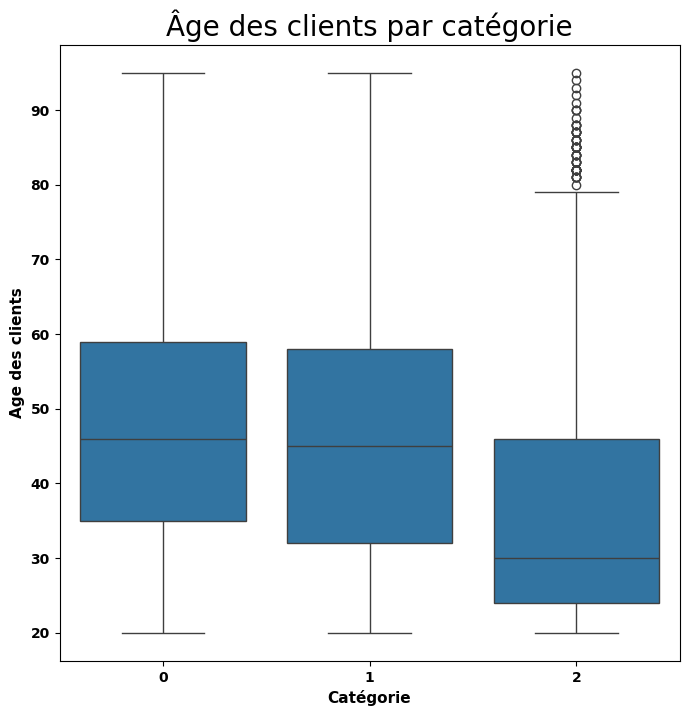

,sum_sq,df,F,PR(>F)
categ,2.433155e+05,1.0,871.028125,2.067783e-187
Residual,5.567863e+06,19932.0,NaN,NaN


In [372]:
#ANOVA - 1 variable qualitative et 1 variable quantitative

#Calcul du nombre de livres acheté par catégorie pour chaque client
df_clients = df_merge.groupby(['client_id','age'])['categ'].value_counts().reset_index()
#display(df_clients)

#Génération et affichage du graphique
plt.figure(figsize = (8,8))
plt.title("Âge des clients par catégorie",fontsize =20)
sns.boxplot(x="categ", y="age", data=df_clients)
plt.xlabel('Catégorie',fontsize = 11,fontweight ='bold')
plt.ylabel('Age des clients',fontsize = 11,fontweight ='bold')
plt.yticks(fontsize = 10,fontweight ='bold')
plt.xticks(fontsize = 10,fontweight ='bold')
plt.show()

model = ols('age ~ categ', data=df_clients).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
display(anova_table)
Print("Pour un seuil de 5%, nous pouvons dire que les 2 variables sont corrélées")

<div style=" background-color: RGB(0,114,200);" >
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">- FIN -</h2>
<h3 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Analysez les ventes d'une librairie avec R ou Python</h3>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 9 DATA ANALYST</h2>
</div>